# 제주도 교통량 예측

- 제주도민 증가와 외국인의 증가로 인한 제주도의 교통체증 증가 해결을 위한 지표로 사용

- 제주빅데이터센터 데이터를 활용하여 효율적인 교통량 측정을 위한 날씨/유동인구 활용 교통량 추이 데이터 제공

- 거주인구, 근무인구, 방문인구는 해당 인구수의 일별 유동인구 수 합계

- 유동인구는 01~24시 해당 시간 정각 측정 인구 (머문 시간(분)/60분)

- 교통량 (대), 평균 속도 (km), 평균 소요 시간 (초), 평균 기온 (°C), 일일강수량 (mm), 평균 풍속(m/s)

데이터 출처 : https://www.jejudatahub.net/data/view/data/753

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [73]:
# 데이터 로드
train_X = pd.read_csv("jejudata/Jeju_trainX.csv",encoding='euc-kr')
train_y= pd.read_csv("jejudata/Jeju_trainy.csv",encoding='euc-kr')
test_X= pd.read_csv("jejudata/Jeju_testX.csv",encoding='euc-kr')
sub= pd.read_csv("jejudata/subExample.csv",encoding='euc-kr')

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(sub.shape)

(22448, 12)
(9621, 12)
(22448,)
(9621, 2)


In [67]:
# 결측치 및 데이터 타입 확인
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22448 entries, 0 to 22447
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        22448 non-null  int64  
 1   일자        22448 non-null  object 
 2   시도명       22448 non-null  object 
 3   읍면동명      22448 non-null  object 
 4   거주인구      22448 non-null  float64
 5   근무인구      22448 non-null  float64
 6   방문인구      22448 non-null  float64
 7   총 유동인구    22448 non-null  float64
 8   평균 속도     22448 non-null  float64
 9   평균 소요 시간  22448 non-null  float64
 10  평균 기온     22448 non-null  float64
 11  일강수량      22448 non-null  float64
 12  평균 풍속     22448 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 2.2+ MB


In [68]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9621 entries, 0 to 9620
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9621 non-null   int64  
 1   일자        9621 non-null   object 
 2   시도명       9621 non-null   object 
 3   읍면동명      9621 non-null   object 
 4   거주인구      9621 non-null   float64
 5   근무인구      9621 non-null   float64
 6   방문인구      9621 non-null   float64
 7   총 유동인구    9621 non-null   float64
 8   평균 속도     9621 non-null   float64
 9   평균 소요 시간  9621 non-null   float64
 10  평균 기온     9621 non-null   float64
 11  일강수량      9621 non-null   float64
 12  평균 풍속     9621 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 977.3+ KB


In [69]:
# 범주형 
set(train_X["시도명"].unique()) == set(test_X["시도명"].unique())

True

In [70]:
set(train_X["읍면동명"].unique()) == set(test_X["읍면동명"].unique())

True

In [71]:
train_X.describe()

,id,거주인구,근무인구,방문인구,총 유동인구,평균 속도,평균 소요 시간,평균 기온,일강수량,평균 풍속
count,22448.000000,2.244800e+04,22448.000000,22448.000000,2.244800e+04,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000
mean,11223.500000,3.175557e+05,35805.028052,196133.748259,5.494945e+05,41.101625,37.221661,13.534623,7.401781,2.738243
std,6480.323757,2.981494e+05,40815.683983,140600.598737,4.611679e+05,8.708300,12.974543,7.749613,28.853829,1.468865
min,0.000000,1.032726e+04,1172.448000,10788.381000,2.228809e+04,23.545000,12.667000,-11.600000,0.000000,0.000000
25%,5611.750000,9.470432e+04,12221.819500,100005.044750,2.228364e+05,34.269000,27.889000,7.600000,0.000000,1.750000
50%,11223.500000,2.219279e+05,21765.337000,153158.832500,3.894584e+05,39.651500,34.500000,13.300000,0.000000,2.400000
75%,16835.250000,4.100979e+05,40316.875750,235928.067500,6.412934e+05,49.101250,46.191000,19.733000,1.500000,3.400000
max,22447.000000,1.353561e+06,272224.930000,786387.113000,2.079278e+06,95.000000,135.400000,30.400000,583.500000,17.700000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'거주인구'}>,
        <AxesSubplot:title={'center':'근무인구'}>],
       [<AxesSubplot:title={'center':'방문인구'}>,
        <AxesSubplot:title={'center':'총 유동인구'}>,
        <AxesSubplot:title={'center':'평균 속도'}>],
       [<AxesSubplot:title={'center':'평균 소요 시간'}>,
        <AxesSubplot:title={'center':'평균 기온'}>,
        <AxesSubplot:title={'center':'일강수량'}>],
       [<AxesSubplot:title={'center':'평균 풍속'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

C:\Users\ysw29\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ysw29\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


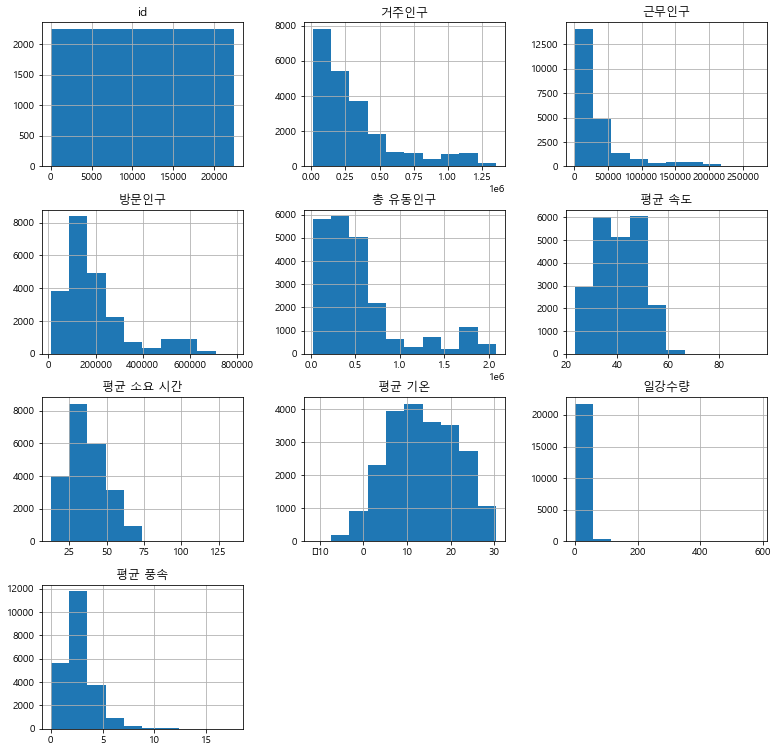

In [72]:
train_X.hist(figsize=(13,13))

In [144]:
train_X["방문인구"].describe()

count     22448.000000
mean     196133.748259
std      140600.598737
min       10788.381000
25%      100005.044750
50%      153158.832500
75%      235928.067500
max      786387.113000
Name: 방문인구, dtype: float64

In [145]:
# 시도명 라벨인코딩
# 일강수량을 비가 조금이라도 왔던 날은 1, 비가 아예 안온 날 0으로 라벨 인코딩

train_X["시도명"] = train_X["시도명"].map(lambda x: 1 if x == "서귀포시" else 0)
test_X["시도명"] = test_X["시도명"].map(lambda x: 1 if x == "서귀포시" else 0)

train_X["일강수량"] = train_X["일강수량"].map(lambda x: 0 if x == 0 else 1)
test_X["일강수량"] = test_X["일강수량"].map(lambda x: 0 if x == 0 else 1)

train_X["방문인구비율"] = train_X["방문인구"] / train_X["총 유동인구"]
test_X["방문인구비율"] = test_X["방문인구"] / test_X["총 유동인구"]

train_X["관광지"] = train_X["방문인구비율"].map(lambda x : 1 if x > 0.5 else 0)
test_X["관광지"] = test_X["방문인구비율"].map(lambda x : 1 if x > 0.5 else 0)


In [149]:
sum(train_X["관광지"])

5051

In [176]:
train_X["관광지"] == 1

0        False
1        False
2        False
3        False
4        False
         ...  
22443    False
22444    False
22445    False
22446    False
22447    False
Name: 관광지, Length: 22448, dtype: bool

In [182]:
print(train_X[train_X["관광지"] == 1]["교통량"].describe())
print(train_X[train_X["관광지"] == 0]["교통량"].describe())

count    5051.000000
mean      379.028293
std       619.277625
min         0.000000
25%         0.000000
50%         0.000000
75%       558.900000
max      2301.500000
Name: 교통량, dtype: float64
count    17397.000000
mean       373.381957
std        504.815630
min          0.000000
25%          0.000000
50%         69.421000
75%        676.697000
max       2035.538000
Name: 교통량, dtype: float64


In [165]:
train_X["교통량"] = train_y["교통량"]

In [83]:
# 읍면동명 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train_X["읍면동명"] = lb.fit_transform(train_X["읍면동명"])
test_X["읍면동명"] = lb.transform(test_X["읍면동명"])

In [84]:
# datetime으로 일자 타입 변환
# 년도, 월, 일, 주 컬럼 생성

def preprocessing(df):
    df["일자"] = pd.to_datetime(df["일자"])
    df["년도"] = df["일자"].dt.year
    df["월"] = df["일자"].dt.month
    df["일"] = df["일자"].dt.day
    df["주"] = df["일자"].dt.weekday

In [85]:
preprocessing(train_X)
preprocessing(test_X)

In [86]:
# 최소 최대 표준화
from sklearn.preprocessing import MinMaxScaler
scaler_feature = ["거주인구","근무인구","방문인구","총 유동인구"]
scaler = MinMaxScaler()

In [87]:
train_X[scaler_feature] = scaler.fit_transform(train_X[scaler_feature])
test_X[scaler_feature] = scaler.fit_transform(test_X[scaler_feature])

In [88]:
new_train = train_X.drop(["일자","id"],axis=1)
new_test = test_X.drop(["일자","id"],axis=1)

array([[<AxesSubplot:title={'center':'시도명'}>,
        <AxesSubplot:title={'center':'읍면동명'}>,
        <AxesSubplot:title={'center':'거주인구'}>,
        <AxesSubplot:title={'center':'근무인구'}>],
       [<AxesSubplot:title={'center':'방문인구'}>,
        <AxesSubplot:title={'center':'총 유동인구'}>,
        <AxesSubplot:title={'center':'평균 속도'}>,
        <AxesSubplot:title={'center':'평균 소요 시간'}>],
       [<AxesSubplot:title={'center':'평균 기온'}>,
        <AxesSubplot:title={'center':'일강수량'}>,
        <AxesSubplot:title={'center':'평균 풍속'}>,
        <AxesSubplot:title={'center':'년도'}>],
       [<AxesSubplot:title={'center':'월'}>,
        <AxesSubplot:title={'center':'일'}>,
        <AxesSubplot:title={'center':'주'}>, <AxesSubplot:>]], dtype=object)

C:\Users\ysw29\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ysw29\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


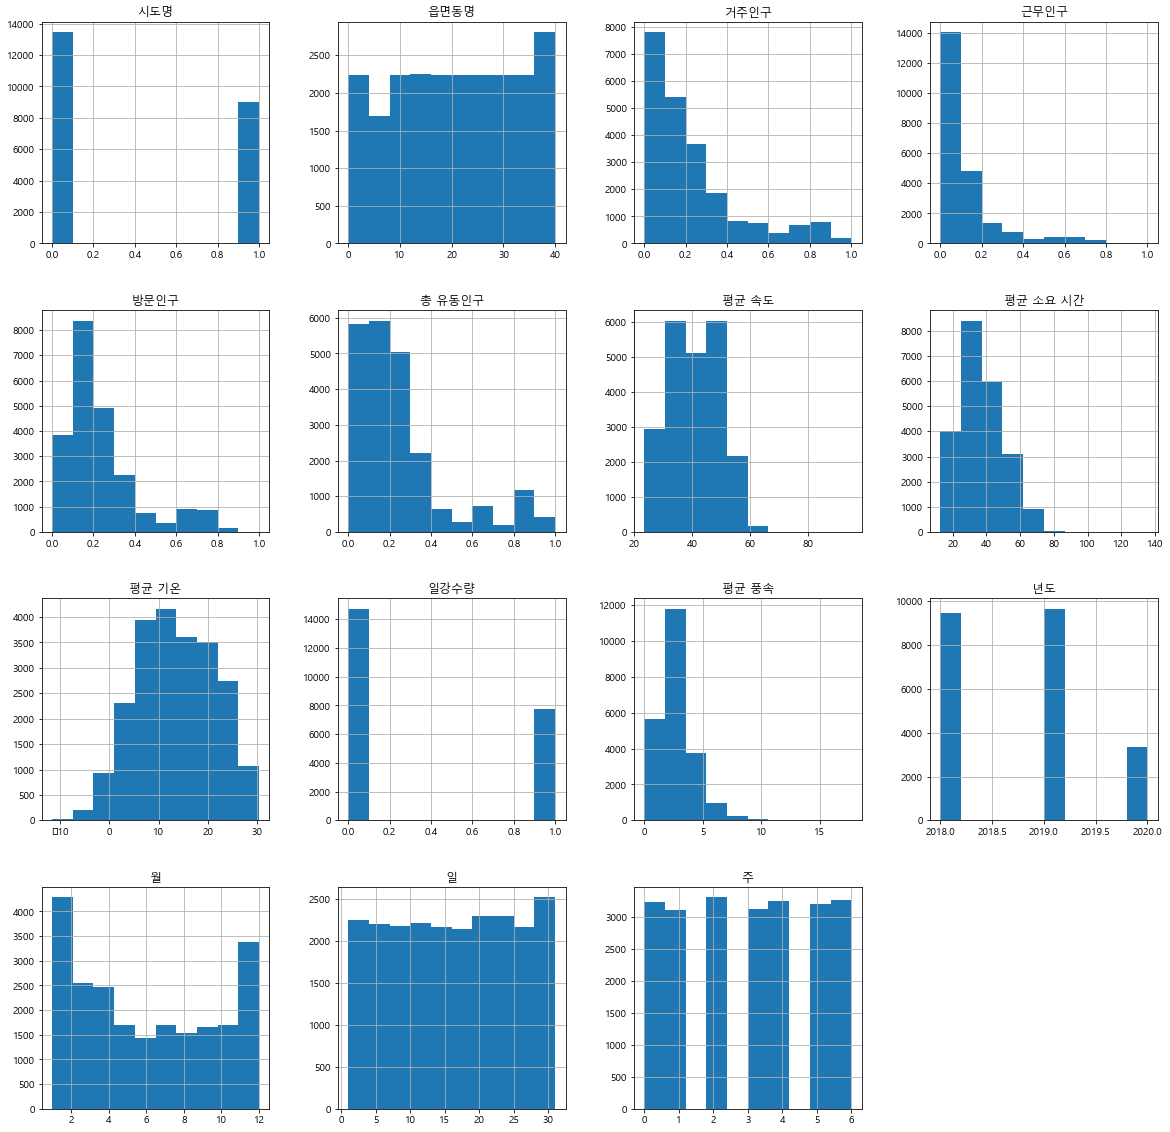

In [89]:
new_train.hist(figsize=(20,20))

In [90]:
# 학습, 검증용 테스트 분리
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_train,train_y["교통량"],test_size=0.15,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(19080, 15) (3368, 15) (19080,) (3368,)


In [91]:
# 그리드서치를 통한 랜덤 포레스트 모델 하이퍼 파라미터 설정

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rnf_reg = RandomForestRegressor(random_state=42)
params = {
    'n_estimators' : [100],
    'max_depth' : [10,12],
    'min_samples_leaf' : [2,4],
    'min_samples_split' : [2,4]
}

grid_cv = GridSearchCV(rnf_reg, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 12], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4], 'n_estimators': [100]})

In [92]:
# 최적의 파라미터
grid_cv.best_params_

{'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [93]:
# 위의 파라미터를 적용한 랜덤 포레스트 모형 적합

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_depth=12,min_samples_leaf=2,min_samples_split=2,random_state=42)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf_pred

array([2.36919873e+00, 1.22474635e+00, 2.15496272e+00, ...,
       2.73708546e-01, 9.93389292e+02, 0.00000000e+00])

In [94]:
# mse 평가 지표를 통한 예측 검증

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(rf_pred,y_test)
mse

11097.697279656333

In [95]:
# 랜덤 포레스트 기본 모형 적합

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf_pred

array([2.66056000e+00, 4.17160000e-01, 1.95600000e-02, ...,
       2.89550000e-01, 1.05542894e+03, 0.00000000e+00])

In [96]:
# mse 평가 지표를 통한 예측 검증

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(rf_pred,y_test)
mse

7582.495698260213

- 그리드 서치를 통한 하이퍼 파라미터 설정의 단점은 분석자가 직접 파라미터 범위를 설정해주기 때문에 최적의 파라미터를 찾기 어렵다
- 그렇게 때문에 기본 모델의 성능이 더 좋게 나온것으로 보인다

In [97]:
# xgboost 기본 모형 적합
# xgboost의 하이퍼 파라미터는 너무 많아서 아직 공부가 더 필요하다
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_pred = xgb_reg.predict(X_test)

mse = mean_squared_error(y_test,xgb_pred)
mse

7644.800856610828

In [98]:
# 보팅으로 기존의 모델을 앙상블

from sklearn.ensemble import VotingRegressor

vot_clf = VotingRegressor(estimators = [('rnf',rf),('xgb',xgb_reg)])
vot_clf.fit(X_train,y_train)
vot_pred = vot_clf.predict(X_test)

In [99]:
mse = mean_squared_error(y_test,vot_pred)
mse

7004.661071449757

In [100]:
# 최종 모델을 통한 예측

from sklearn.ensemble import VotingRegressor

vot_clf = VotingRegressor(estimators = [('rnf',rf),('xgb',xgb_reg)])
vot_clf.fit(new_train,train_y["교통량"])

VotingRegressor(estimators=[('rnf', RandomForestRegressor(random_state=42)),
                            ('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=8,
                                          num_parallel_tree=1, random_state=0,
                                 

In [101]:
sub["교통량"] = vot_clf.predict(new_test)
sub.to_csv('./submission.csv')
sub.head(3)

,id,교통량
0,22448,1387.766324
1,22449,1088.700637
2,22450,272.148472


In [102]:
def FinalMseScore():
    import pandas as pd
    y_true = pd.read_csv("jejudata/Jeju_testy.csv",encoding='euc-kr')
    sub = pd.read_csv('./submission.csv',index_col='id')
    pred = sub.iloc[:,-1].values
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(pred,y_true['교통량'])    
    print('submission mse score : ',mse)
    return mse

In [103]:
final_mse = FinalMseScore()

submission mse score :  6485.615640443616
